In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
# https://www.kaggle.com/mirichoi0218/insurance
df = pd.read_csv("./insurance.csv")
df.head()
df.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

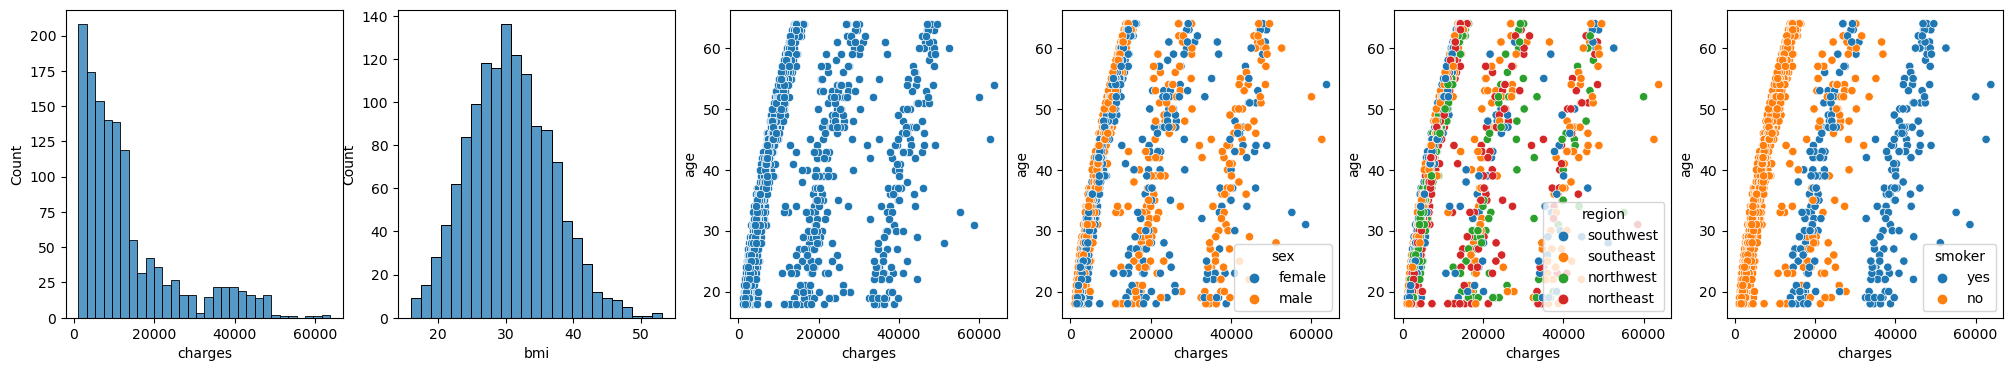

In [4]:
fig, axs = plt.subplots(1, 6, figsize=(25,4))

axs[0] = sns.histplot(x="charges", data=df, ax= axs[0])
axs[1] = sns.histplot(x="bmi", data=df, ax = axs[1])
axs[2] = sns.scatterplot(x="charges", y="age", data=df, ax = axs[2])
axs[3] = sns.scatterplot(x="charges", y="age", data=df, hue="sex", ax = axs[3])
axs[4] = sns.scatterplot(x="charges", y="age", data=df, hue="region", ax = axs[4])
axs[5] = sns.scatterplot(x="charges", y="age", data=df, hue="smoker", ax = axs[5])
# Sex and region doesn't separate the data for charges vs age, but whether or not they are a smoker does. 


In [5]:
df1 = df[df['smoker'] == "no"]

score: 0.3943171632425906


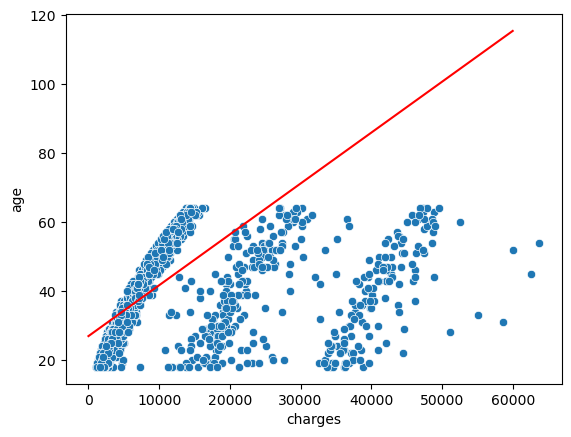

In [6]:
x = np.array(df1['charges']).reshape(-1,1)
y = np.array(df1['age']).reshape(-1,1)
model1 = LinearRegression().fit(x, y)

print('score:', model1.score(x,y))

x_pred = np.linspace(0, 60000, num=20).reshape((-1,1))
y_pred = model1.predict(x_pred)
sns.scatterplot(data=df, x="charges", y="age")
plt.plot(x_pred, y_pred, color="red")
plt.show()

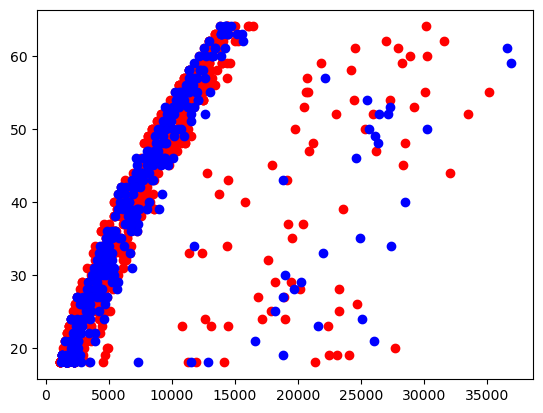

training score: 0.41866422715160545
testing score: 0.3273373164368075


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

plt.scatter(x_train, y_train, color="red")
plt.scatter(x_test, y_test, color="blue")
plt.show()

model2 = LinearRegression().fit(x_train, y_train)
print('training score:', model2.score(x_train,y_train))
print('testing score:', model2.score(x_test,y_test))

In [8]:
df2 = df[df['smoker'] == "yes"]

<AxesSubplot: xlabel='charges', ylabel='age'>

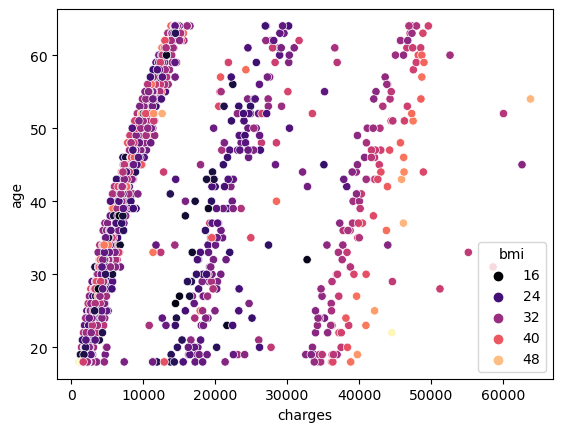

In [9]:
sns.scatterplot(x="charges", y="age", data=df, hue="bmi", palette="magma")

In [10]:
df3 = df2[df2['bmi'] <= 30]
df4 = df2[df2['bmi'] > 30]

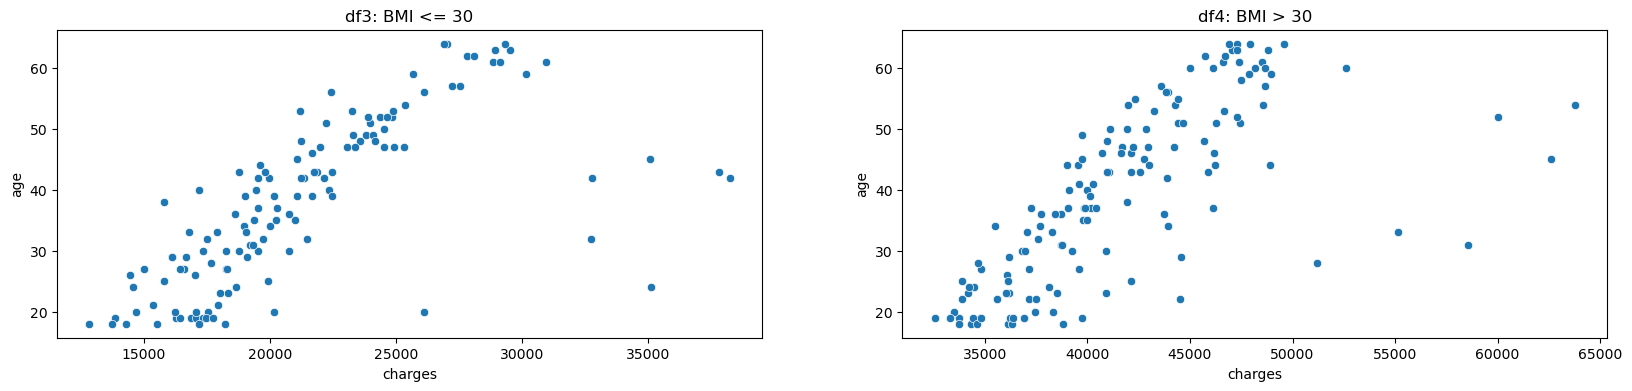

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20,4))

axs[0] = sns.scatterplot(x="charges", y="age", data=df3, ax = axs[0]).set(title='df3: BMI <= 30')
axs[1] = sns.scatterplot(x="charges", y="age", data=df4, ax = axs[1]).set(title='df4: BMI > 30')

score 0.48188123850084164


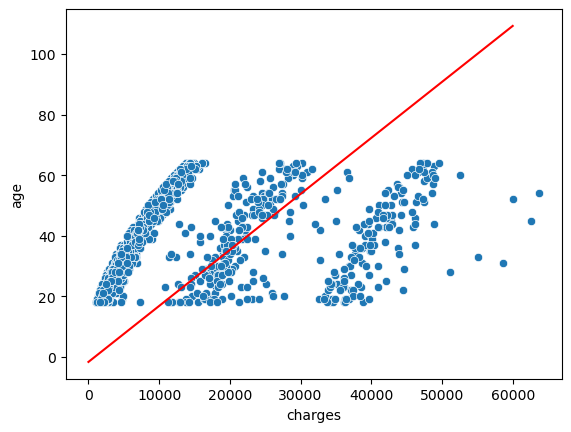

In [12]:
x = np.array(df3['charges']).reshape(-1,1)
y = np.array(df3['age']).reshape(-1,1)
model1 = LinearRegression().fit(x, y)

print('score', model1.score(x,y))

x_pred = np.linspace(0, 60000, num=20).reshape((-1,1))
y_pred = model1.predict(x_pred)
sns.scatterplot(data=df, x="charges", y="age")
plt.plot(x_pred, y_pred, color="red")
plt.show()

score 0.486603439908629


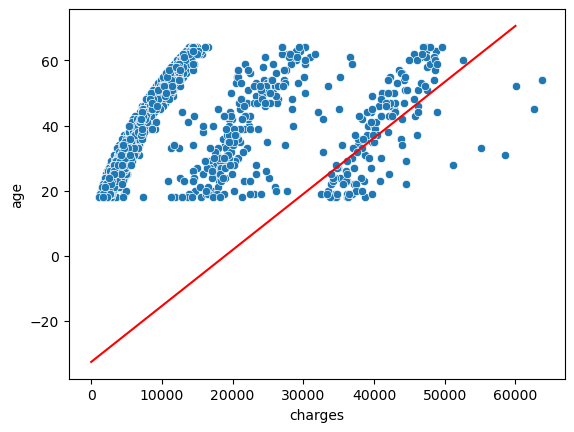

In [13]:
x = np.array(df4['charges']).reshape(-1,1)
y = np.array(df4['age']).reshape(-1,1)
model1 = LinearRegression().fit(x, y)

print('score', model1.score(x,y))


x_pred = np.linspace(0, 60000, num=20).reshape((-1,1))
y_pred = model1.predict(x_pred)
sns.scatterplot(data=df, x="charges", y="age")
plt.plot(x_pred, y_pred, color="red")
plt.show()

In [14]:
a = np.array(df1['charges']).reshape(-1,1)
b = np.array(df1['age']).reshape(-1,1)

a = sm.add_constant(a)
modols = sm.OLS(b, a)
results = modols.fit()
print(results.summary())

print("score:", results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     691.4
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          9.17e-118
Time:                        11:25:37   Log-Likelihood:                -4056.8
No. Observations:                1064   AIC:                             8118.
Df Residuals:                    1062   BIC:                             8128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9408      0.581     46.408      0.0